# Clustering using Euclidean Distance

## Preparations

In [86]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import math
from functools import reduce
sns.set()
%matplotlib inline
import os

### Read the data

In [87]:
#GRANULARITY = 'one_hour'
#GRANULARITY = 'thirty_min'
GRANULARITY = 'five_min'
#GRANULARITY = 'one_min'

IMAGES_DIR = 'images/clustering/'
PATH = 'data/cleaned/samples50/' + GRANULARITY + '/'
DIR_CONTENT = os.listdir(PATH)

In [88]:
column_names = list(map(lambda s: s.split('.')[0], DIR_CONTENT))

In [89]:
df = pd.DataFrame(columns=column_names)

In [90]:
for filename in DIR_CONTENT:
    _id = filename.split('.')[0]
    tmp_df = pd.read_csv(PATH + filename)
    df[_id] = tmp_df['heart_rate']

In [91]:
df.head(5)

,yyyyy_12,ggggg_4,eeeee_12,eeeee_13,xxxxx_8,yyyyy_13,yyyyy_11,eeeee_11,eeeee_10,yyyyy_10,...,xxxxx_3,eeeee_18,xxxxx_2,xxxxx_6,ttttt_3,ttttt_2,xxxxx_7,xxxxx_5,ttttt_1,xxxxx_4
0,0.000000,0.0,0.0,0.618519,0.0,0.0,0.000000,29.296296,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.183333,0.0,0.0,0.000000,14.210000,1.943333,0.0,...,0.0,3.366667,0.0,14.816667,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.863333,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,70.823333,0.0,0.0,0.0,0.0,0.0,0.0
3,14.123333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,65.673333,0.0,0.0,0.0,0.0,0.0,0.0
4,17.566667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,4.870000,0.0,...,0.0,0.000000,0.0,64.916667,0.0,0.0,0.0,0.0,0.0,0.0


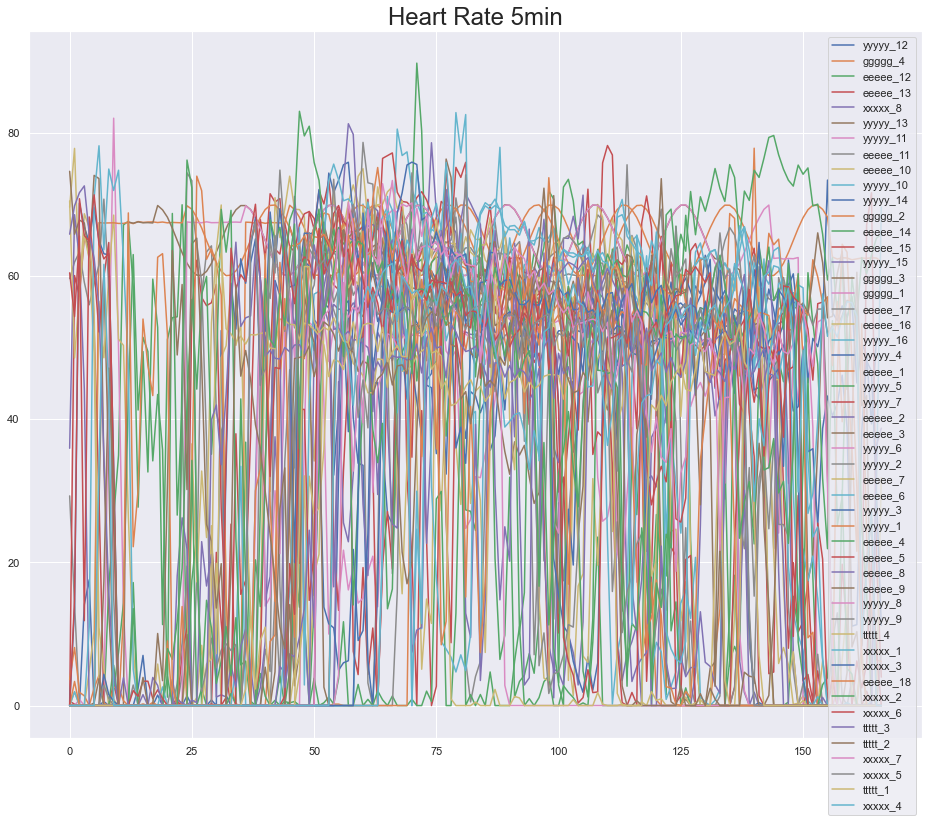

In [92]:
ax = df.plot(legend=True, figsize=(16,13))
plt.title('Heart Rate 5min', size=24)
fig = ax.get_figure()
fig.savefig(IMAGES_DIR + 'hr_5min_all.png')

### Normalize the data

In [93]:
_mean = df.mean()
_std = df.std()

In [94]:
dfn = (df - _mean) / _std

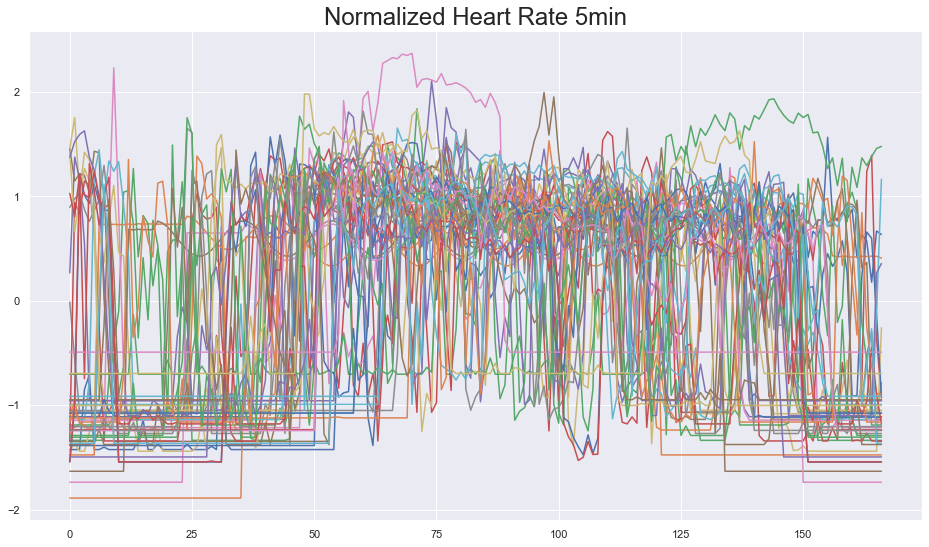

In [95]:
axn = dfn.plot(legend=False, figsize=(16,9))
plt.title('Normalized Heart Rate 5min', size=24)
fign = axn.get_figure()
#fig.savefig(IMAGES_DIR + 'hr_5min_all_normalized.png')

## Calculate Euclidean distance

In [96]:
from sklearn.metrics.pairwise import euclidean_distances

In [97]:
dfnt = dfn.transpose()
euc_matrix = euclidean_distances(dfnt)

In [98]:
euc_matrix[0]

array([ 0.        , 10.3684798 , 15.41927686, 16.98772838, 15.15900355,
        7.84074517, 12.05226463, 15.50023795, 16.52607778,  9.78906879,
        7.85929905, 21.46427882, 14.91022822, 17.02696605, 11.43079728,
       19.3914142 , 15.54592728, 17.05233669, 15.58367111, 10.75598915,
       17.10053198, 15.38295796, 12.93650279, 10.27378566, 15.84318677,
       15.39241912, 14.65841418,  9.37405911, 14.60247913, 15.94874767,
       15.47249629,  8.37542172, 17.42349581, 15.26495334, 16.01912215,
       13.49842919, 16.13790127, 16.50507342, 18.79389648, 11.15891463,
        9.74722906, 17.34642881, 15.88169248, 16.97377351, 15.71950113,
       17.65268591, 10.05792471, 15.46315038, 16.12262497,  7.84550883])

## Create Clusters

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from validclust.indices import dunn

from collections import defaultdict


In [129]:
cvi_lists = defaultdict(list)

for nbr_clusters in range(2, 21):
    tmp_model = KMeans(n_clusters=nbr_clusters, random_state=42)
    tmp_model.fit(euc_matrix)
    tmp_cluster_labels = tmp_model.labels_
    
    sil_score = silhouette_score(euc_matrix, tmp_cluster_labels)
    cvi_lists['sil'].append((nbr_clusters, sil_score))
    
    db_score = davies_bouldin_score(euc_matrix, tmp_cluster_labels)
    cvi_lists['db'].append((nbr_clusters, db_score))
    
    dunn_score = dunn(euc_matrix, tmp_cluster_labels)
    cvi_lists['dunn'].append((nbr_clusters, dunn_score))
    
    ch_score = calinski_harabasz_score(euc_matrix, tmp_cluster_labels)
    cvi_lists['ch'].append((nbr_clusters, ch_score))
    
    
    

In [130]:
cvi_lists

defaultdict(list,
            {'sil': [(2, 0.2928762187920497),
              (3, 0.2079235805848382),
              (4, 0.21515300634100915),
              (5, 0.22409830020094682),
              (6, 0.19078237511630003),
              (7, 0.19044025664017533),
              (8, 0.18613279829096058),
              (9, 0.19693096906726276),
              (10, 0.19662597748576124),
              (11, 0.17036167310291436),
              (12, 0.16712524204709328),
              (13, 0.18743429814103404),
              (14, 0.17672690009547914),
              (15, 0.22523477411641007),
              (16, 0.20002074553318944),
              (17, 0.2279818599756024),
              (18, 0.20937797745690087),
              (19, 0.215784847851027),
              (20, 0.22317823378143767)],
             'db': [(2, 1.3304321052887635),
              (3, 1.6692164552310589),
              (4, 1.6135892134163008),
              (5, 1.3429487426452034),
              (6, 1.384791059012329),
        

Text(0, 0.5, 'CVI Score')

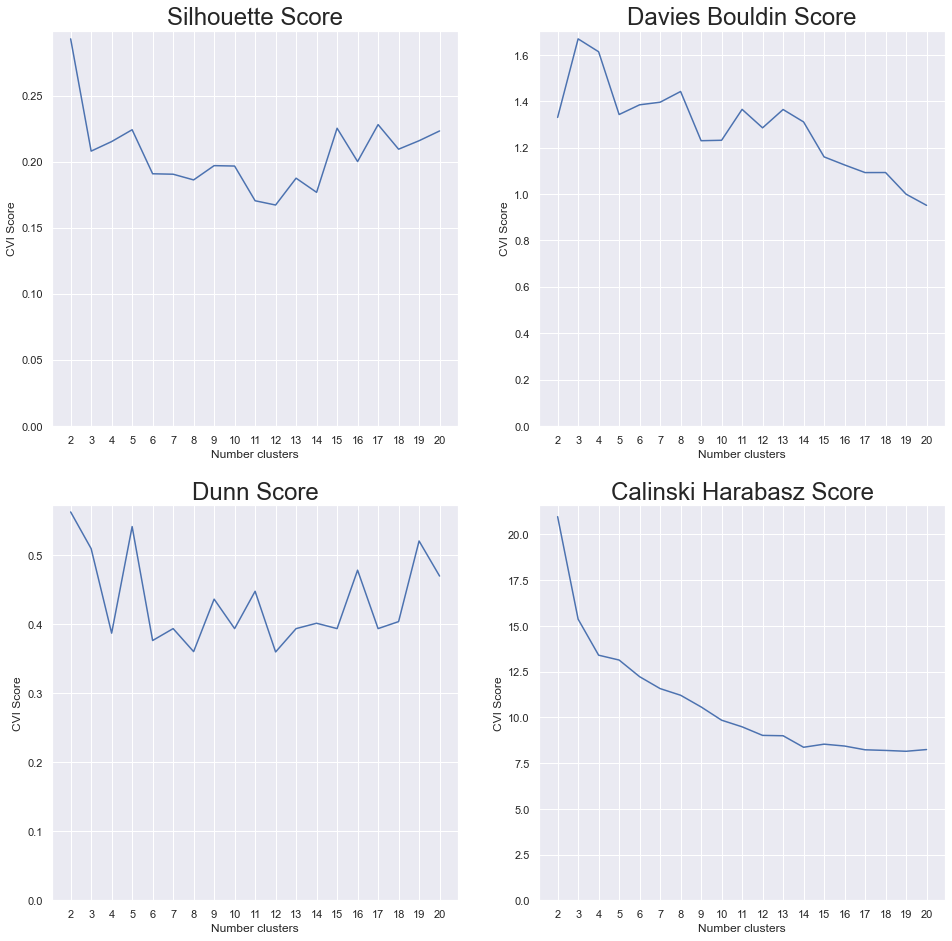

In [131]:
fig, axs = plt.subplots(2, 2, figsize=(16,16))

plt.setp(axs, xticks=list(range(2,21)))

x_sil, y_sil = list(zip(*cvi_lists['sil']))
axs[0][0].plot(x_sil, y_sil)
axs[0][0].set_ylim(0, )
axs[0][0].set_title('Silhouette Score', size=24)
axs[0][0].set_xlabel('Number clusters')
axs[0][0].set_ylabel('CVI Score')


x_db, y_db = list(zip(*cvi_lists['db']))
axs[0][1].plot(x_db, y_db)
axs[0][1].set_ylim(0, )
axs[0][1].set_title('Davies Bouldin Score', size=24)
axs[0][1].set_xlabel('Number clusters')
axs[0][1].set_ylabel('CVI Score')


x_dunn, y_dunn = list(zip(*cvi_lists['dunn']))
axs[1][0].plot(x_dunn, y_dunn)
axs[1][0].set_ylim(0, )
axs[1][0].set_title('Dunn Score', size=24)
axs[1][0].set_xlabel('Number clusters')
axs[1][0].set_ylabel('CVI Score')


x_ch, y_ch = list(zip(*cvi_lists['ch']))
axs[1][1].plot(x_ch, y_ch)
axs[1][1].set_ylim(0, )
axs[1][1].set_title('Calinski Harabasz Score', size=24)
axs[1][1].set_xlabel('Number clusters')
axs[1][1].set_ylabel('CVI Score')


#fig.savefig(IMAGES_DIR + 'euclidean_cvis.png')

In [55]:
from optimizer import get_cvi_combination

(1.3304321052887635, 1.6692164552310589, 1.6135892134163008, 1.3429487426452034, 1.384791059012329, 1.3959704959568664, 1.4422283604168797, 1.229960116219452, 1.2318394824834098, 1.3651300609667052, 1.2854971008059721, 1.3644868860542363, 1.3109510590411337, 1.1602300828961238, 1.1254791422513297, 1.0925002779824426, 1.0927081473021818, 0.9994695808865345, 0.9512113187510207)


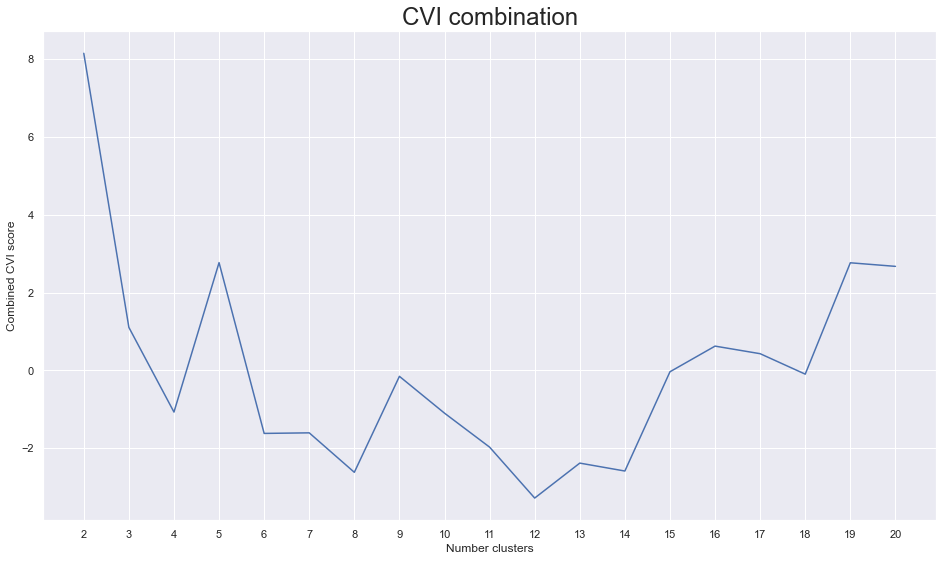

In [135]:
y = get_cvi_combination(y_sil, y_dunn, y_db, y_ch)

fig = plt.figure(figsize=(16,9))
plt.plot(x_ch, y)
ax = fig.gca()
plt.setp(ax, xticks=list(range(2,21)))
ax.set_title("CVI combination", size=24)
ax.set_xlabel('Number clusters')
ax.set_ylabel('Combined CVI score')
#fig.savefig(IMAGES_DIR + 'cvi_combination_euc.png')

## Display Clusters

In [136]:
number_clusters = 16

In [137]:
model = KMeans(n_clusters=number_clusters, random_state=42)

In [138]:
model.fit(euc_matrix)

KMeans(n_clusters=16, random_state=42)

In [139]:
cluster_labels = model.labels_
cluster_labels

array([ 6,  6,  5,  9, 14,  6,  0, 12,  2,  4,  0, 10, 15, 13,  4, 10,  2,
        3,  3,  0,  7, 12,  8,  4,  1,  3, 14,  0,  3,  3, 14,  0,  9,  3,
        3,  5, 15, 13,  1,  0,  4,  1, 13,  7,  2,  1,  4, 14, 11,  6],
      dtype=int32)

In [140]:
cluster_names = defaultdict(list)
for i, cid in enumerate(cluster_labels):
    c_name = dfnt.index[i]
    cluster_names[cid].append(c_name)

In [141]:
cluster_names

defaultdict(list,
            {6: ['yyyyy_12', 'ggggg_4', 'yyyyy_13', 'xxxxx_4'],
             5: ['eeeee_12', 'eeeee_9'],
             9: ['eeeee_13', 'eeeee_4'],
             14: ['xxxxx_8', 'yyyyy_6', 'yyyyy_3', 'xxxxx_5'],
             0: ['yyyyy_11',
              'yyyyy_14',
              'yyyyy_16',
              'yyyyy_2',
              'yyyyy_1',
              'xxxxx_1'],
             12: ['eeeee_11', 'eeeee_1'],
             2: ['eeeee_10', 'ggggg_1', 'ttttt_3'],
             4: ['yyyyy_10', 'yyyyy_15', 'yyyyy_7', 'xxxxx_3', 'xxxxx_7'],
             10: ['ggggg_2', 'ggggg_3'],
             15: ['eeeee_14', 'yyyyy_8'],
             13: ['eeeee_15', 'yyyyy_9', 'xxxxx_2'],
             3: ['eeeee_17',
              'eeeee_16',
              'eeeee_3',
              'eeeee_7',
              'eeeee_6',
              'eeeee_5',
              'eeeee_8'],
             7: ['yyyyy_4', 'xxxxx_6'],
             8: ['yyyyy_5'],
             1: ['eeeee_2', 'ttttt_4', 'eeeee_18', 'ttttt_2']

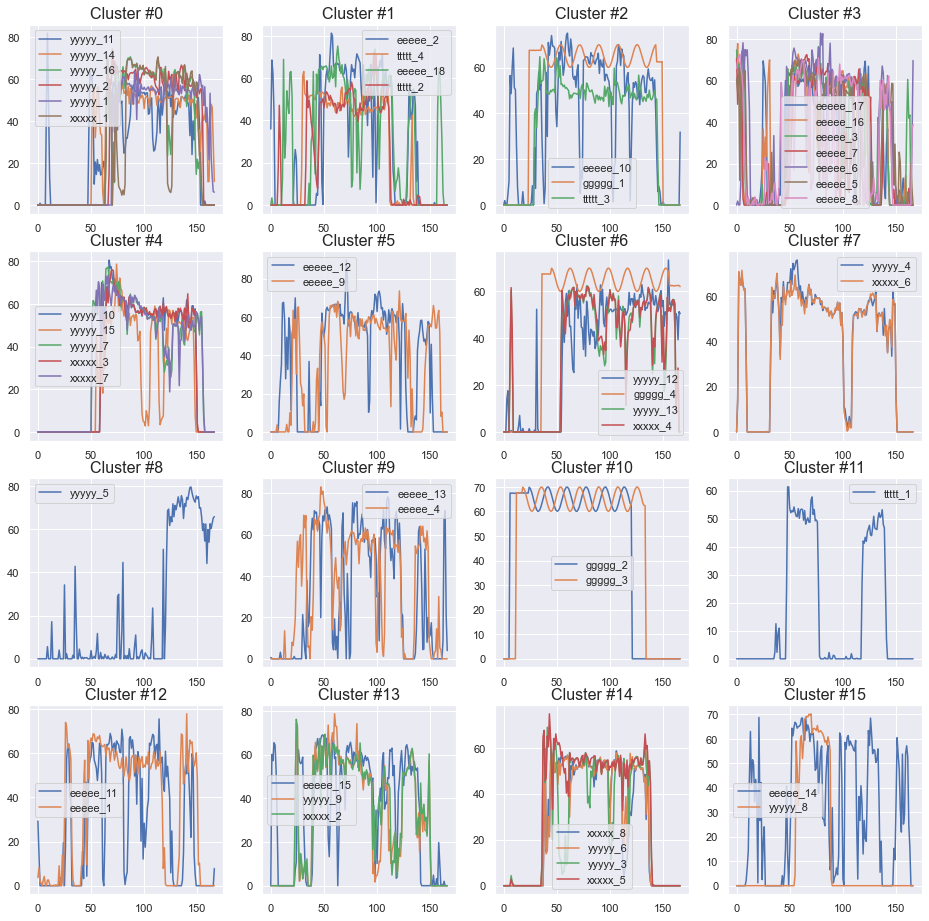

In [158]:

fig, axs = plt.subplots(4,4)

for cluster_id in range(len(cluster_names)):
    i = cluster_id % 4  # Column
    j = cluster_id // 4 # Row
    
    ax = axs[j][i]
    
    names = cluster_names[cluster_id]
    #ax = df[[*names]].plot(figsize=(16,9))
    df[[*names]].plot(ax=ax, figsize=(16,16), legend=True)
    ax.set_title(f"Cluster #{cluster_id}", size=16)

#fig.savefig(IMAGES_DIR + 'euclidean_clustering.png')